In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/flowinn_torch/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/flowinn_torch


In [2]:
!pip install -e .

Obtaining file:///content/drive/MyDrive/flowinn_torch
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for flowinn_torch (pyproject.toml) ... done
  Created wheel for flowinn_torch: filename=flowinn_torch-1.0.0-0.editable-py3-none-any.whl size=1434 sha256=24b55072a2b5c77552deedb218ddadadec7b9786bc2a1580063c29cda805ad2a
  Stored in directory: /tmp/pip-ephem-wheel-cache-7r9rbdby/wheels/35/b2/d8/b403297199699f9b9be1cfda3c8b8c333f9b7e7d5c1b445317
Successfully built flowinn_torch
  Attempting uninstall: flowinn_torch
    Found existing installation: flowinn_torch 1.0.0
    Uninstalling flowinn_torch-1.0.0:
      Successfully uninstalled flowinn_torch-1.0.0


In [3]:
from flowinn_torch.tests.FlowOverAirfoil import FlowOverAirfoil

----------------------------------------------------------------------
Model Summary (Input Dim: 2, Output Dim: 3):
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 3200]           9,600
       BatchNorm1d-2                 [-1, 3200]           6,400
              SiLU-3                 [-1, 3200]               0
          Identity-4               [-1, 64, 50]               0
            Conv1d-5               [-1, 64, 50]          12,288
       BatchNorm1d-6               [-1, 64, 50]             128
              SiLU-7               [-1, 64, 50]               0
            Conv1d-8               [-1, 64, 50]          12,288
       BatchNorm1d-9               [-1, 64, 50]             128
             SiLU-10               [-1, 64, 50]               0
Conv1dResidualBlock-11               [-1, 64, 50]               0
         Identity-12               [-1, 64, 50]  

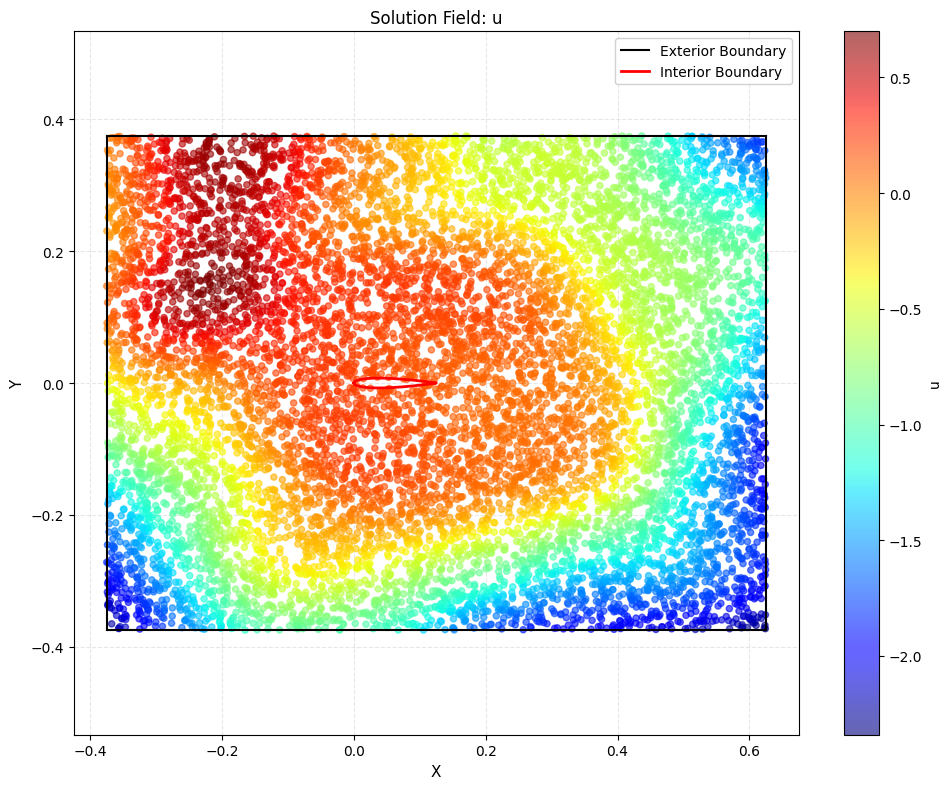

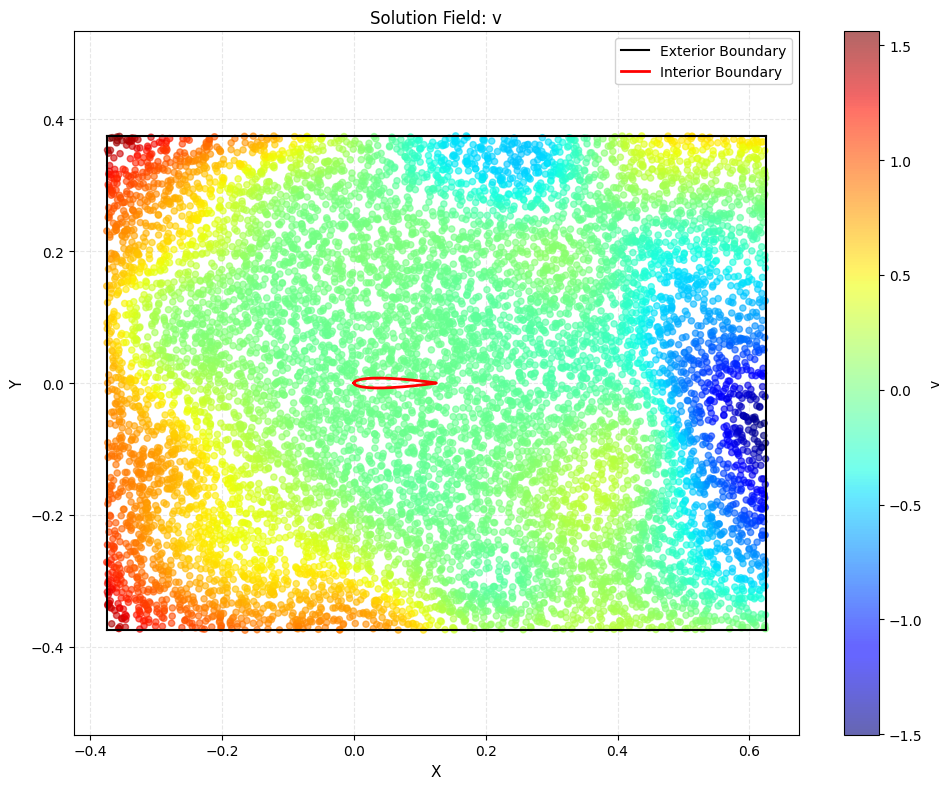

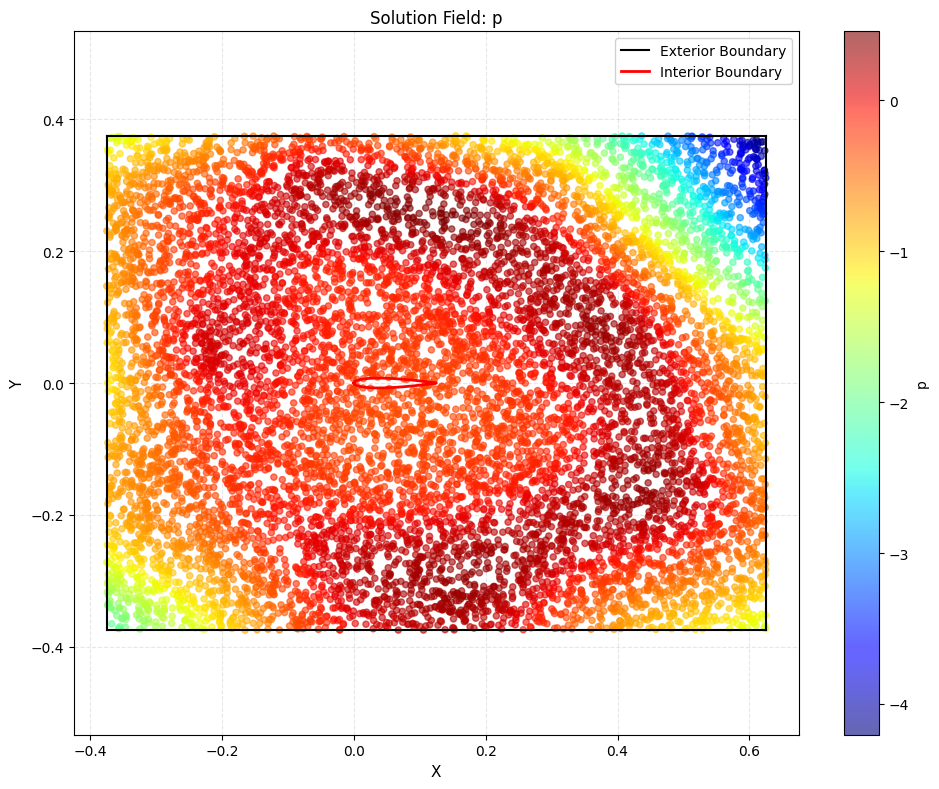

Simulation completed successfully!


In [4]:
def main(model_type='simple_residual_mlp', layer_size=[40, 80, 80, 40, 20], drop_out=0.0):
    # Domain setup
    x_range = (-3.0, 5.0)
    y_range = (-3.0, 3.0)
    angle_of_attack = 5.0  # degrees

    # Simulation parameters
    case_name = "FlowOverAirfoil"
    epochs = 50
    print_interval = 5
    autosave_interval = 1000

    # Mesh parameters
    nx = 100
    ny = 100
    n_boundary = 100

    trainedModel = False

    try:
        # 'conv1d_residual_net', 'mfn' or 'simple_mlp' or 'simple_residual_mlp'
        airfoil = FlowOverAirfoil(case_name, x_range, y_range, AoA=angle_of_attack, model_type=model_type, layer_size=layer_size, drop_out=drop_out)

        # Generate mesh
        print("Generating mesh...")
        airfoil.generateMesh(Nx=nx, Ny=ny, NBoundary=n_boundary, sampling_method='random')

        # Train the model
        if trainedModel:
            print("Loading pre-trained model...")
            airfoil.load_model()
        else:
            print("Starting training...")
            airfoil.train(epochs=epochs,
                        print_interval=print_interval,
                        autosaveInterval=autosave_interval)

        # Predict and visualize
        print("Predicting flow field...")
        airfoil.predict()

        # Plot results
        print("Generating plots...")
        airfoil.plot(solkey='u')
        airfoil.plot(solkey='v')
        airfoil.plot(solkey='p')

        print("Simulation completed successfully!")

    except Exception as e:
        print(f"Error during simulation: {str(e)}")
        raise

if __name__ == "__main__":
    main(model_type='conv1d_residual_net')